## degree centrality - sequential

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
os.getcwd()

'/Users/yingchen/Documents2/CASA/urban_simulation/practical/wk7/Week_7_final'

In [3]:
os.chdir("./underground")
g_shp=nx.read_shp('underground.shp',geom_attrs=False) 

In [4]:
# original *undirected* network
g_shp=nx.read_shp('underground.shp',geom_attrs=False) 

nod_st1={(e1):weight for e1, e2, weight in g_shp.edges(data='station_1_')}
nod_st2={(e2):weight for e1, e2, weight in g_shp.edges(data='station_2_')}
nod_all = {**nod_st1, **nod_st2}
nx.set_node_attributes(g_shp,nod_all,'station')

g_shp_un = g_shp.to_undirected()

In [5]:
print(nx.info(g_shp_un))

Name: 
Type: Graph
Number of nodes: 306
Number of edges: 353
Average degree:   2.3072


### Degree centrality

In [6]:
# degree centrality: 
deg_london=nx.degree(g_shp_un)
# We can add these values to the nodes attributes:
nx.set_node_attributes(g_shp_un,dict(deg_london),'degree')

In [7]:
dict_deg_london=dict(g_shp_un.nodes(data=True))

from collections import OrderedDict
listdeg_un=OrderedDict(sorted(dict_deg_london.items(), key=lambda x: x[1]['degree'],reverse=True))
list(listdeg_un.items())[:10]


[((-0.1571, 51.5226), {'station': 'Baker Street', 'degree': 7}),
 ((-0.1238, 51.5308), {'station': "King's Cross St. Pancras", 'degree': 7}),
 ((-0.1143, 51.5036), {'station': 'Waterloo', 'degree': 6}),
 ((-0.1415, 51.515), {'station': 'Oxford Circus', 'degree': 6}),
 ((-0.0886, 51.5133), {'station': 'Bank', 'degree': 6}),
 ((-0.1973, 51.492), {'station': "Earl's Court", 'degree': 6}),
 ((-0.1428, 51.5067), {'station': 'Green Park', 'degree': 6}),
 ((-0.1755, 51.5154), {'station': 'Paddington', 'degree': 5}),
 ((-0.0823, 51.5178), {'station': 'Liverpool Street', 'degree': 5}),
 ((-0.2547, 51.4951), {'station': 'Turnham Green', 'degree': 5})]

Text(0.5, 1.0, 'London Tube Degree Histogram')

<Figure size 864x576 with 0 Axes>

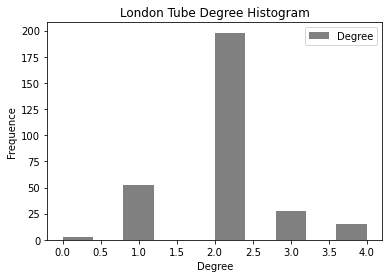

In [27]:
df=pd.DataFrame(list(deg_london),columns=['station','Degree']).set_index('station')


plt.figure(figsize=(12, 8))

df.plot(kind='hist',color='gray')
plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.title("London Tube Degree Histogram")

In [9]:
# degree centrality: 
deg_w=nx.degree_centrality(g_shp_un)
# We can add these values to the nodes attributes:
nx.set_node_attributes(g_shp_un,deg_w,'degree_w')

DC = pd.DataFrame.from_dict(deg_w,columns=['degree_w'],orient='index')
DC.sort_values(by=['degree_w'],ascending=False)[:10]

,degree_w
"(-0.1571, 51.5226)",0.022951
"(-0.1238, 51.5308)",0.022951
"(-0.1143, 51.5036)",0.019672
"(-0.1973, 51.492)",0.019672
"(-0.0886, 51.5133)",0.019672
"(-0.1428, 51.5067)",0.019672
"(-0.1415, 51.515)",0.019672
"(-0.1755, 51.5154)",0.016393
"(-0.2547, 51.4951)",0.016393
"(-0.056, 51.5117)",0.016393


In [10]:
# the top 10 stations with the maximum degree centrality values
maxdegree10=DC.sort_values(by=['degree_w'],ascending=False)[:10]
maxdegree10 = maxdegree10.index.tolist()
for i in maxdegree10:
    print(g_shp_un.nodes[i]['station'])

Baker Street
King's Cross St. Pancras
Waterloo
Earl's Court
Bank
Green Park
Oxford Circus
Paddington
Turnham Green
Shadwell


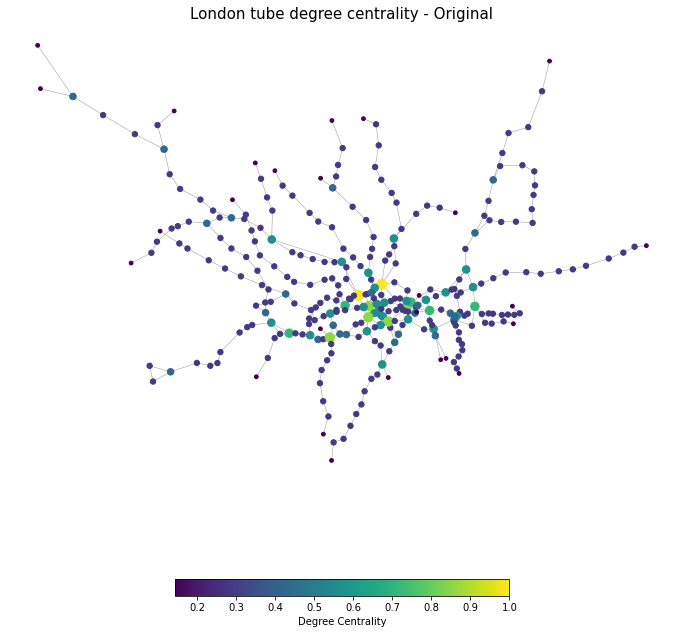

In [11]:
# original degree centrality 
degree_w_values=[(i[1]['degree_w']) for i in g_shp_un.nodes(data=True)]

deg_w_color=[(i[1]['degree_w']/max(degree_w_values)) for i in g_shp_un.nodes(data=True)]
deg_w_size=[(i[1]['degree_w']/max(degree_w_values)*100) for i in g_shp_un.nodes(data=True)]


# Plot graph
pos_shp = {xy: xy for xy in g_shp.nodes()}
pos=pos_shp

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(g_shp_un, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= deg_w_color,
        node_size= deg_w_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality - Original",fontsize=15)
plt.show()

In [12]:
l1=list(g_shp_un.nodes)
len(l1)

306

### Sequential removal

In [13]:
deg10=[(-0.1571, 51.5226),
(-0.1238, 51.5308),
(-0.1143, 51.5036),
(-0.1415, 51.515),
(-0.1973, 51.492),
(-0.1755, 51.5154),
(-0.0886, 51.5133),
(-0.2547, 51.4951),
(-0.1428, 51.5067),
(0.0082, 51.5147)]

In [14]:
# stations that are being removed
for i in deg10:
    print(g_shp_un.nodes[i]['station'])

Baker Street
King's Cross St. Pancras
Waterloo
Oxford Circus
Earl's Court
Paddington
Bank
Turnham Green
Green Park
Canning Town


In [15]:
for i in range (10):
    a = nx.get_node_attributes(g_shp_un,'degree')
    for n in g_shp_un:
        if a[n] == max(dict(deg_london).values()):
            g_shp_un.remove_node(n)
            deg_london=nx.degree(g_shp_un)
            print(n)
            nx.set_node_attributes(g_shp_un,dict(deg_london),'degree')
            break

(-0.1571, 51.5226)
(-0.1238, 51.5308)
(-0.1143, 51.5036)
(-0.1415, 51.515)
(-0.1973, 51.492)
(-0.1755, 51.5154)
(-0.0886, 51.5133)
(-0.2547, 51.4951)
(-0.1428, 51.5067)
(0.0082, 51.5147)


In [16]:
# Nodes after the removal
l2=list(g_shp_un.nodes)
len(l2)

296

In [17]:
print(nx.info(g_shp_un))

Name: 
Type: Graph
Number of nodes: 296
Number of edges: 296
Average degree:   2.0000


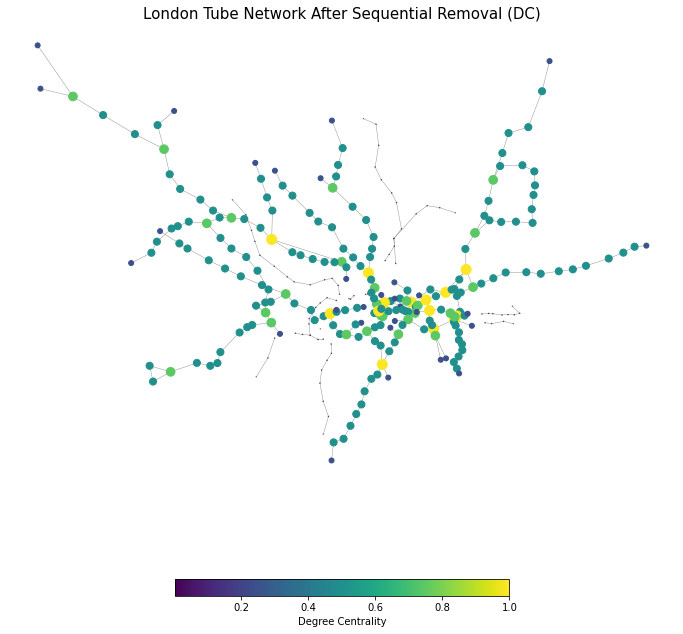

<Figure size 432x288 with 0 Axes>

In [28]:
# graph after removal
degree_w_values=[(i[1]['degree_w']) for i in g_shp_un.nodes(data=True)]

deg_w_color=[(i[1]['degree_w']/max(degree_w_values)) for i in g_shp_un.nodes(data=True)]
deg_w_size=[(i[1]['degree_w']/max(degree_w_values)*100) for i in g_shp_un.nodes(data=True)]


# Plot graph
pos_shp = {xy: xy for xy in g_shp.nodes()}
pos=pos_shp

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(g_shp_un, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= deg_w_color,
        node_size= deg_w_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Tube Network After Sequential Removal (DC)",fontsize=15)

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('p1_DC4.png', dpi=100)

In [19]:
print(nx.info(g_shp_un))

Name: 
Type: Graph
Number of nodes: 296
Number of edges: 296
Average degree:   2.0000


### Analysis

In [20]:
# 1. all connected components 
components = [len(c) for c in sorted(nx.connected_components(g_shp_un), key=len, reverse=True)]
len(components) # there are 13 components in the network after removal


13

In [21]:
# 2. largest component
largest_component = max(nx.connected_components(g_shp_un), key=len)
G2 = g_shp_un.subgraph(largest_component)

In [22]:
print(nx.info(G2)) 

Name: 
Type: Graph
Number of nodes: 225
Number of edges: 237
Average degree:   2.1067


In [29]:
# 4. unweighted diameter
nx.diameter(G2)

58

In [30]:
# 5. weighted (distance) diameter
nlen = {n:nx.single_source_dijkstra_path_length(G2, n, weight='distance') 
        for n in G2.nodes() }
e = nx.eccentricity(G2,sp=nlen)
d = nx.diameter(G2, e)
d

83265.211471644

In [31]:
# 6. global eff
eff = nx.global_efficiency(G2)
eff

0.07940481660082217

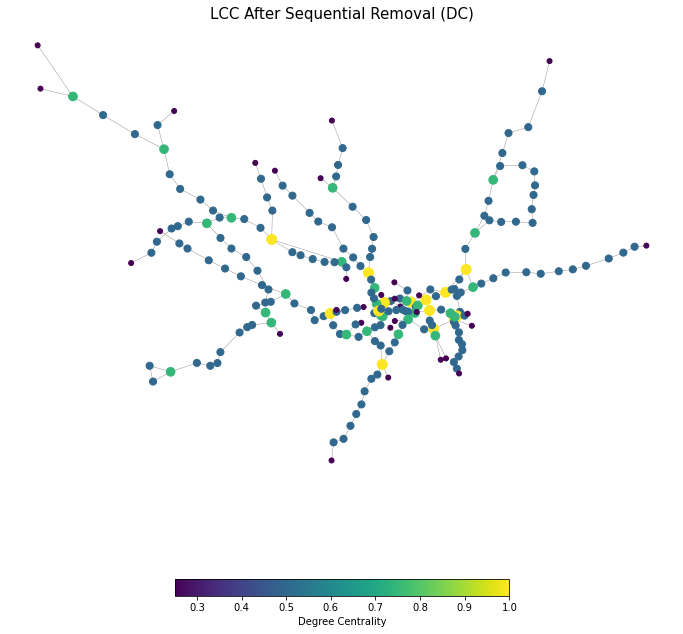

<Figure size 432x288 with 0 Axes>

In [33]:
#Let's compare node centrality for the undirected tube network and the directed commuting flows network:
#Let us compute the betweenness centrality for the undirected tube network
deg_london_t=nx.degree(G2)
# We can add these values as node attributes:
nx.set_node_attributes(G2,dict(deg_london_t),'degree_w')


# plot
degree_w_values=[(i[1]['degree_w']) for i in G2.nodes(data=True)]

deg_w_color=[(i[1]['degree_w']/max(degree_w_values)) for i in G2.nodes(data=True)]
deg_w_size=[(i[1]['degree_w']/max(degree_w_values)*100) for i in G2.nodes(data=True)]


# Plot graph
pos_shp = {xy: xy for xy in g_shp.nodes()}
pos=pos_shp

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G2, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G2,
        pos = pos,
        node_color= deg_w_color,
        node_size= deg_w_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("LCC After Sequential Removal (DC)",fontsize=15)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('p1_DC5.png', dpi=100)